<a href="https://colab.research.google.com/github/MarcoParola/structural_health_monitoring/blob/main/convolutional_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional architectures to solve Damage Localization and Quantification problems**

In this notebook there are some implementation of convolutional neural network to solve the following tasks:


*   Multi-class classification, **damage localization task**
*   Regression, **damage quantification**



### Link Drive, import packages and declare global variables

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import numpy as np
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix
from scipy import stats
import seaborn as sn
import tensorflow as tf

projectPath = 'drive/MyDrive/Colab Notebooks/thesis2/'

NUMBER_OF_CLASS = 9
TRUNCATE = 9000

# the most usefull sensors are: 1,5,9,12,14,15
filter_indeces = [1,5,9,12,14,15]

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                     mode='min', verbose=1, 
                                                     patience=20, 
                                                     restore_best_weights=True)

In [ ]:
%cd $projectPath
%run utils.ipynb
%cd '../../../..'

/content/drive/MyDrive/Colab Notebooks/thesis
/content


Load dataset and labels

In [ ]:
with open(TRAINING_SET_SIGNALS_250HZ, 'rb') as f:
  data = np.load(f, allow_pickle=True)

labels = load_dataset('train_damage_labels_250hz')
levels = load_dataset('train_damage_levels_250hz')

randomize = np.arange(len(labels))
np.random.shuffle(randomize)
data = data[randomize,:,:]
labels = labels[randomize]
levels = levels[randomize]

dataset = data[0:TRUNCATE, :, :]
testset = data[TRUNCATE:len(data), :, :]

labels_train = labels[0:TRUNCATE]
levels_train = levels[0:TRUNCATE]
labels_test = labels[TRUNCATE:len(labels)]
levels_test = levels[TRUNCATE:len(levels)]

labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

print(dataset.shape)
print(testset.shape)

(9999,)
(9999,)
(9000, 1751, 6)
(999, 1751, 6)


# **Classification**

### model 1

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1751, 6)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1751, 16)          3472      
                                                                 
 batch_normalization_3 (Batc  (None, 1751, 16)         64        
 hNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 1751, 64)          28736     
                                                                 
 batch_normalization_4 (Batc  (None, 1751, 64)         256       
 hNormalization)                                                 
                                                                 
 global_average_pooling1d_1   (None, 64)               0    

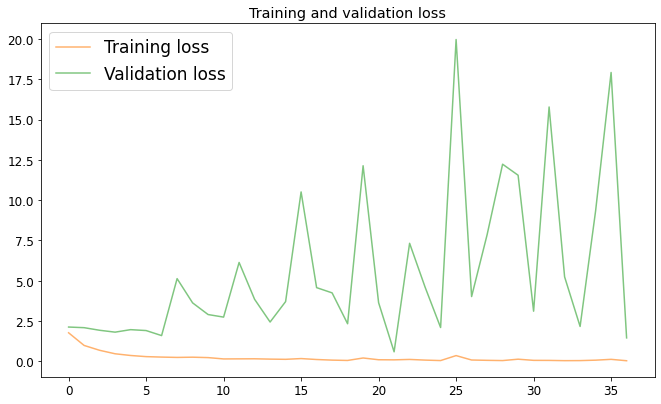

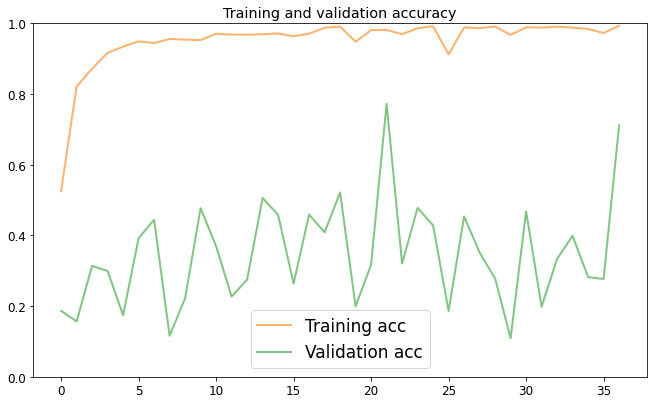

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.75      0.64       124
           1       0.96      0.23      0.37       114
           2       0.00      0.00      0.00       112
           3       0.95      0.95      0.95       118
           4       0.85      0.99      0.92       104
           5       0.47      1.00      0.64       126
           6       1.00      0.93      0.97        89
           7       1.00      1.00      1.00       103
           8       0.97      1.00      0.99       109

    accuracy                           0.76       999
   macro avg       0.75      0.76      0.72       999
weighted avg       0.74      0.76      0.71       999



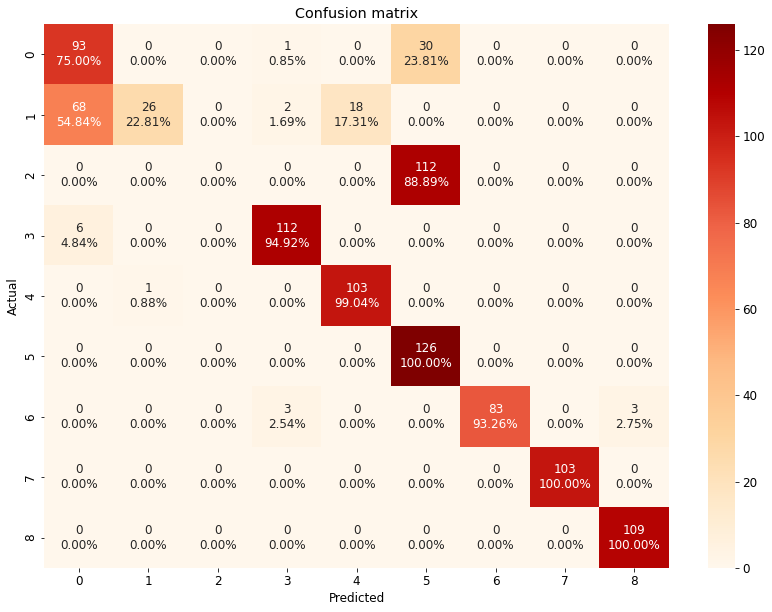

In [ ]:
inputs = keras.Input(shape=(len(dataset[0]), len(filter_indeces)))


x = layers.Conv1D(16,36, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(64, 28, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(NUMBER_OF_CLASS, activation='softmax')(x)

model = keras.Model(inputs, x, name='model1')
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(dataset, labels_train, epochs=50, callbacks=[earlyStopCallback], shuffle=True, batch_size=256, validation_split=0.2)

plot_accurancy_loss(history)
evaluateClassifier(model, testset, levels_test)

### model 2

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1751, 6)]         0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1751, 16)          3088      
                                                                 
 batch_normalization_5 (Batc  (None, 1751, 16)         64        
 hNormalization)                                                 
                                                                 
 conv1d_6 (Conv1D)           (None, 1751, 32)          12320     
                                                                 
 batch_normalization_6 (Batc  (None, 1751, 32)         128       
 hNormalization)                                                 
                                                                 
 global_average_pooling1d_2   (None, 32)               0    

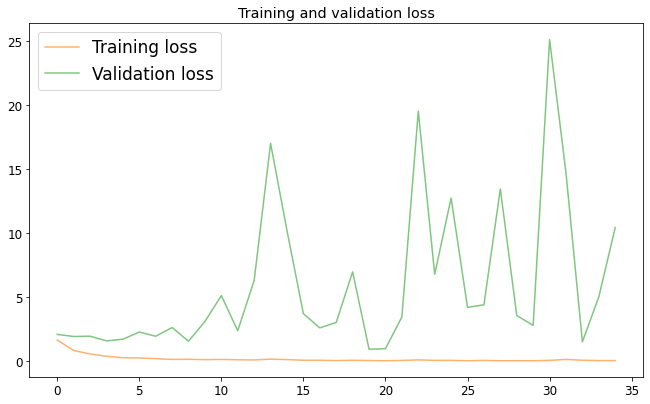

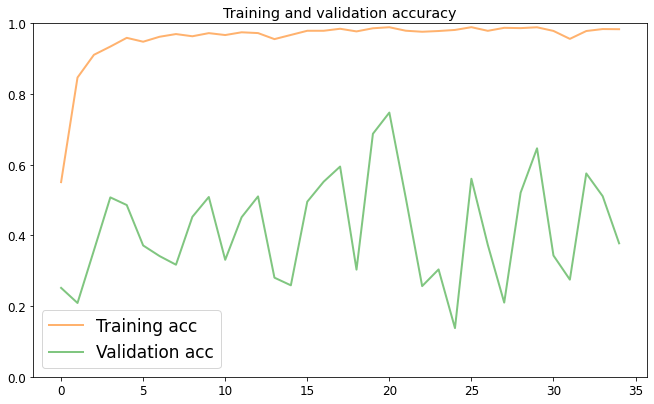

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.77      0.88      0.82       114
           2       0.37      1.00      0.54       112
           3       0.72      0.72      0.72       118
           4       1.00      0.71      0.83       104
           5       0.81      1.00      0.89       126
           6       1.00      0.54      0.70        89
           7       1.00      0.83      0.91       103
           8       1.00      0.55      0.71       109

    accuracy                           0.69       999
   macro avg       0.74      0.69      0.68       999
weighted avg       0.72      0.69      0.67       999



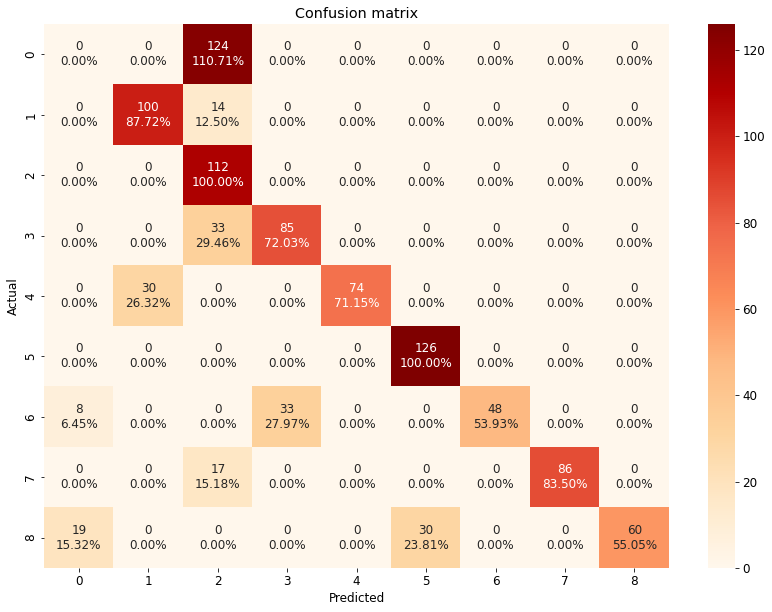

In [ ]:
inputs = keras.Input(shape=(len(dataset[0]), len(filter_indeces)))


x = layers.Conv1D(16, 32, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(32, 24, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(NUMBER_OF_CLASS, activation='softmax')(x)

model = keras.Model(inputs, x, name='model1')
model.summary()


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(dataset, labels_train, epochs=50, callbacks=[earlyStopCallback], shuffle=True, batch_size=128, validation_split=0.2)

plot_accurancy_loss(history)
evaluateClassifier(model, testset, levels_test)

### model 3

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1751, 6)]         0         
                                                                 
 conv1d_41 (Conv1D)          (None, 1751, 16)          3088      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 219, 16)          0         
 g1D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 219, 16)           0         
                                                                 
 conv1d_42 (Conv1D)          (None, 219, 32)           10272     
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 37, 32)           0         
 g1D)                                                       

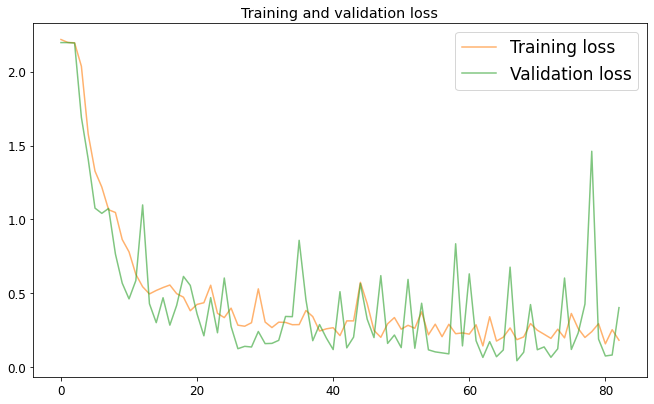

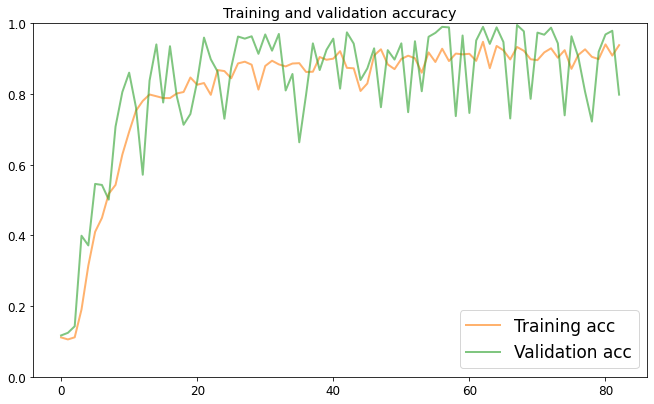

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       108
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00       119
           5       1.00      1.00      1.00       110
           6       1.00      1.00      1.00       113
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00       110

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999



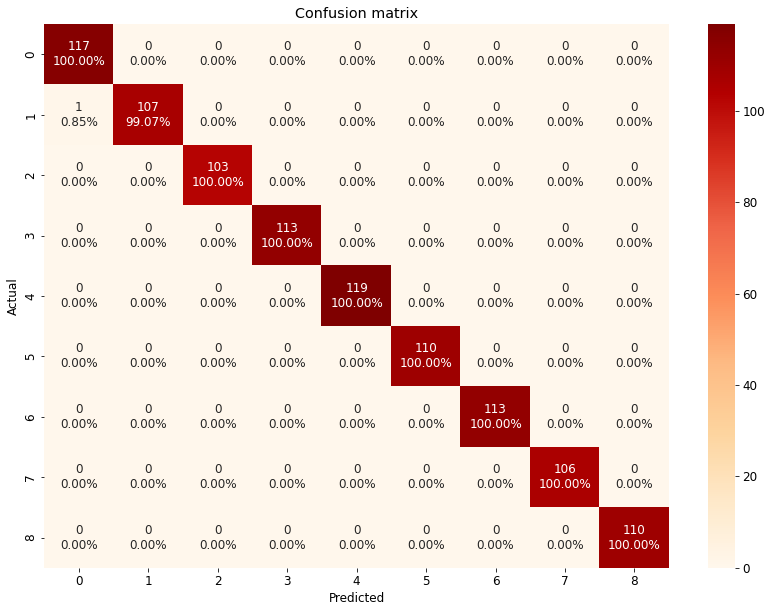

In [ ]:
inputs = keras.Input(shape=(len(dataset[0]), 6))


x = layers.Conv1D(16, 32, activation='relu', padding='same')(inputs)
x = layers.MaxPooling1D(8, padding='same')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Conv1D(32, 20, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(6, padding='same')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Conv1D(16, 12, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(4, padding='same', name='last')(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten(name='encoer_flatted')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(NUMBER_OF_CLASS, activation='softmax')(x)

model = keras.Model(inputs, x, name='model1')
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(dataset, labels_train, epochs=130, callbacks=[earlyStopCallback], batch_size=64, validation_split=0.15)

plot_accurancy_loss(history)
evaluateClassifier(model, testset, levels_test)


In [ ]:
model.save(os.path.join(MODELS_PATH, "conv_classifier.h5")) 

# **Regression**

### model 1

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1751, 6)]         0         
                                                                 
 conv1d_30 (Conv1D)          (None, 1751, 16)          2416      
                                                                 
 batch_normalization_9 (Batc  (None, 1751, 16)         64        
 hNormalization)                                                 
                                                                 
 conv1d_31 (Conv1D)          (None, 1751, 32)          10272     
                                                                 
 batch_normalization_10 (Bat  (None, 1751, 32)         128       
 chNormalization)                                                
                                                                 
 global_average_pooling1d_5   (None, 32)               0    

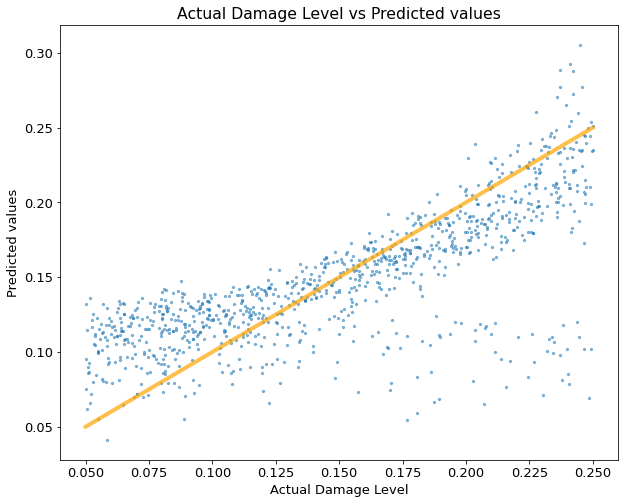

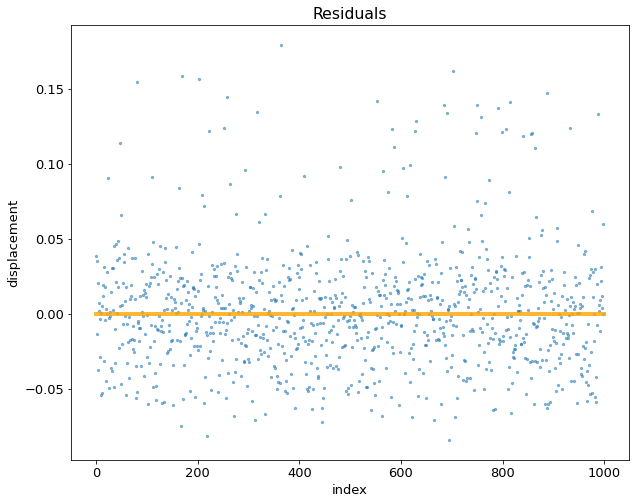

(0.9219622611999512, 2.5530618605925925e-22)


In [ ]:
inputs = keras.Input(shape=(len(dataset[0]), len(filter_indeces)))


x = layers.Conv1D(16, 25, activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(32, 20, activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(1)(x)

model = keras.Model(inputs, x, name='model1')
model.summary()


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(dataset, levels_train, epochs=150, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.2)

evaluateRegressor(model, testset, levels_test)

### model 2

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1751, 6)]         0         
                                                                 
 conv1d_32 (Conv1D)          (None, 1751, 16)          784       
                                                                 
 average_pooling1d_2 (Averag  (None, 351, 16)          0         
 ePooling1D)                                                     
                                                                 
 dropout_25 (Dropout)        (None, 351, 16)           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 351, 32)           2592      
                                                                 
 average_pooling1d_3 (Averag  (None, 176, 32)          0         
 ePooling1D)                                                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


113/113 [==============================] - 3s 14ms/step - loss: 0.0199 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 2/150
113/113 [==============================] - 1s 12ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 3/150
113/113 [==============================] - 2s 14ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 4/150
113/113 [==============================] - 1s 12ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 5/150
113/113 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 6/150
113/113 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/150
113/113 [==============================] - 1s 12ms/step - loss: 0.0035 - accuracy: 0.000

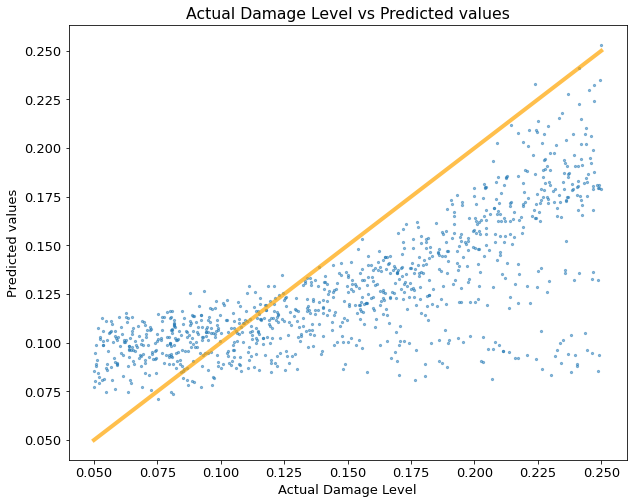

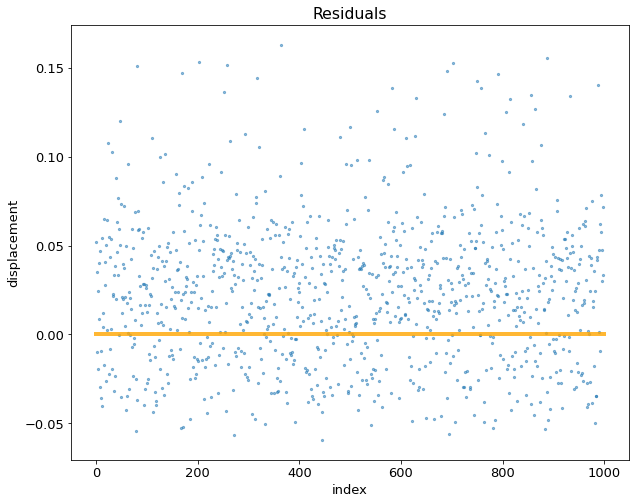

(0.9764277338981628, 1.1813709732688693e-11)


In [ ]:
inputs = keras.Input(shape=(len(dataset[0]), 6))


x = layers.Conv1D(16, 8, activation='relu', padding='same')(inputs)
x = layers.AveragePooling1D(5, padding='same')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = layers.AveragePooling1D(2, padding='same')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
x = layers.AveragePooling1D(2, padding='same', name='last')(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten(name='encoer_flatted')(x)
#x = layers.Dense(16, activation='relu')(x)
#x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(1)(x)

model = keras.Model(inputs, x, name='model1')
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(dataset, levels_train, epochs=150, callbacks=[earlyStopCallback], batch_size=64, validation_split=0.2)

evaluateRegressor(model, testset, levels_test)

### model 3

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1751, 6)]         0         
                                                                 
 conv1d_35 (Conv1D)          (None, 1751, 16)          784       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 351, 16)          0         
 g1D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 351, 16)           0         
                                                                 
 conv1d_36 (Conv1D)          (None, 351, 32)           2592      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 176, 32)          0         
 g1D)                                                       

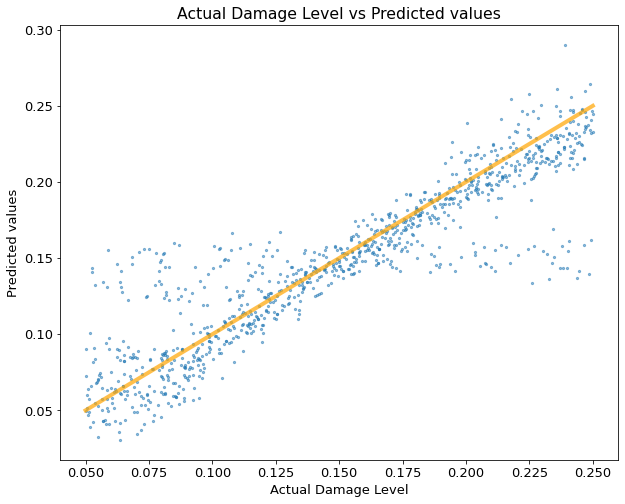

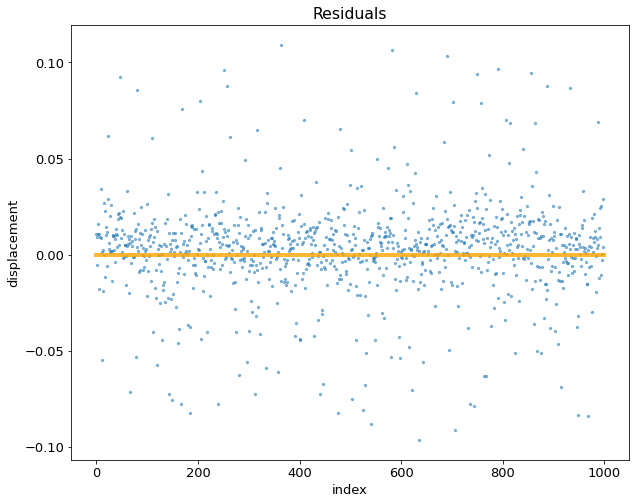

(0.8854131698608398, 1.532668146066984e-26)


In [ ]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(14) 

inputs = keras.Input(shape=(len(dataset[0]), 6))
x = layers.Conv1D(16, 8, activation='relu', padding='same')(inputs)
x = layers.MaxPooling1D(5, padding='same')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Conv1D(32, 5, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='model1')
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(dataset, levels_train, epochs=180, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.15)

evaluateRegressor(model, testset, levels_test)

In [ ]:
model.save(os.path.join(MODELS_PATH, "conv_regressor.h5")) 